In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Vikas/Desktop/CNX/indian_liver_patient.csv")

In [3]:
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [4]:
df.shape

(583, 11)

In [ ]:
df.columns

In [ ]:
#df.columns.unique

In [5]:
df.drop(["Gender","Aspartate_Aminotransferase",
        "Albumin_and_Globulin_Ratio"],axis=1,inplace=True)


In [6]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,0.7,0.1,187,16,6.8,3.3,1
1,62,10.9,5.5,699,64,7.5,3.2,1
2,62,7.3,4.1,490,60,7.0,3.3,1
3,58,1.0,0.4,182,14,6.8,3.4,1
4,72,3.9,2.0,195,27,7.3,2.4,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       583 non-null    int64  
 1   Total_Bilirubin           583 non-null    float64
 2   Direct_Bilirubin          583 non-null    float64
 3   Alkaline_Phosphotase      583 non-null    int64  
 4   Alamine_Aminotransferase  583 non-null    int64  
 5   Total_Protiens            583 non-null    float64
 6   Albumin                   583 non-null    float64
 7   Dataset                   583 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 36.6 KB


In [8]:
def missing_percent(df):
    nan_percent = 100*(df.isnull().sum()/len(df))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [9]:
miss = missing_percent(df)
miss

,% of Misiing Values


In [10]:
# Get some base information on our dataset
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  583
Columns  :  8

Features : 
 ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin', 'Dataset']

Missing values :   0

Unique values :  
 Age                          72
Total_Bilirubin             113
Direct_Bilirubin             80
Alkaline_Phosphotase        263
Alamine_Aminotransferase    152
Total_Protiens               58
Albumin                      40
Dataset                       2
dtype: int64


In [11]:
df['Dataset'] = df['Dataset'].map({2:0,1:1}) 

In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,6.483190,3.141852,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,1.085451,0.795519,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,2.700000,0.900000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,5.800000,2.600000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,6.600000,3.100000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,7.200000,3.800000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,9.600000,5.500000,1.000000


<AxesSubplot:>

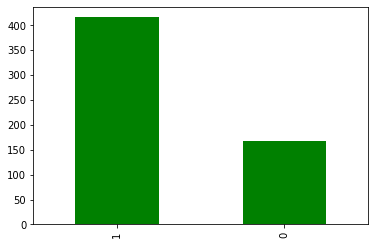

In [14]:
df['Dataset'].value_counts().plot.bar(color='green')

<AxesSubplot:>

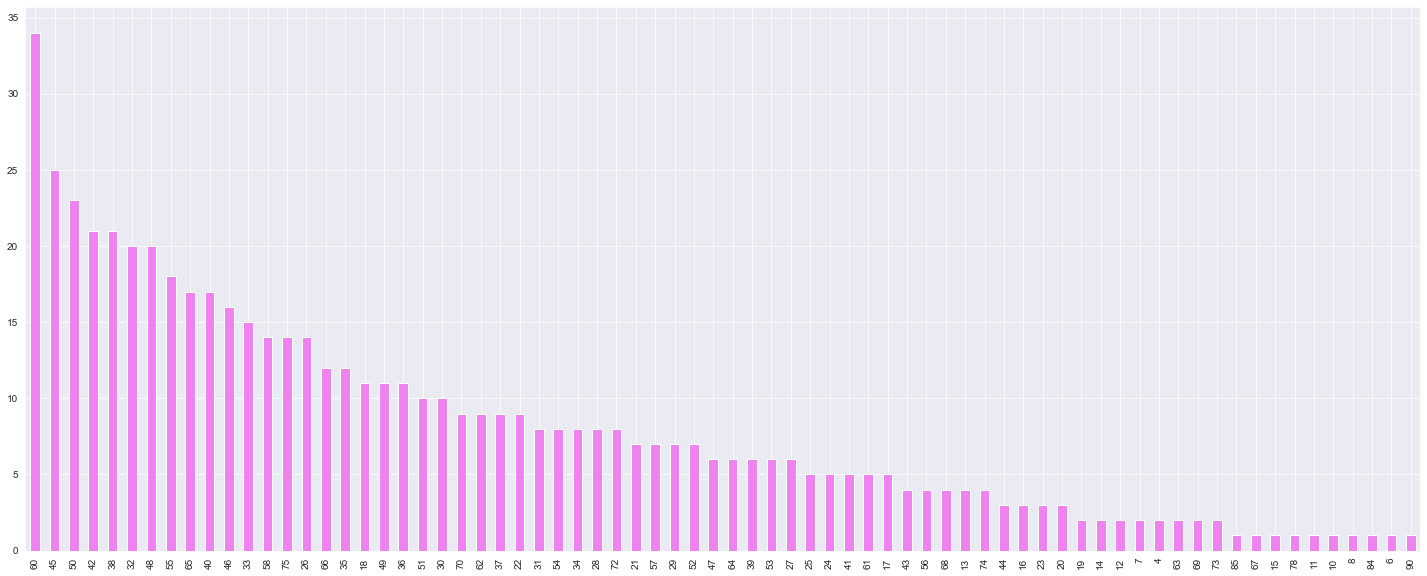

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['Age'].value_counts().plot.bar(color='violet')

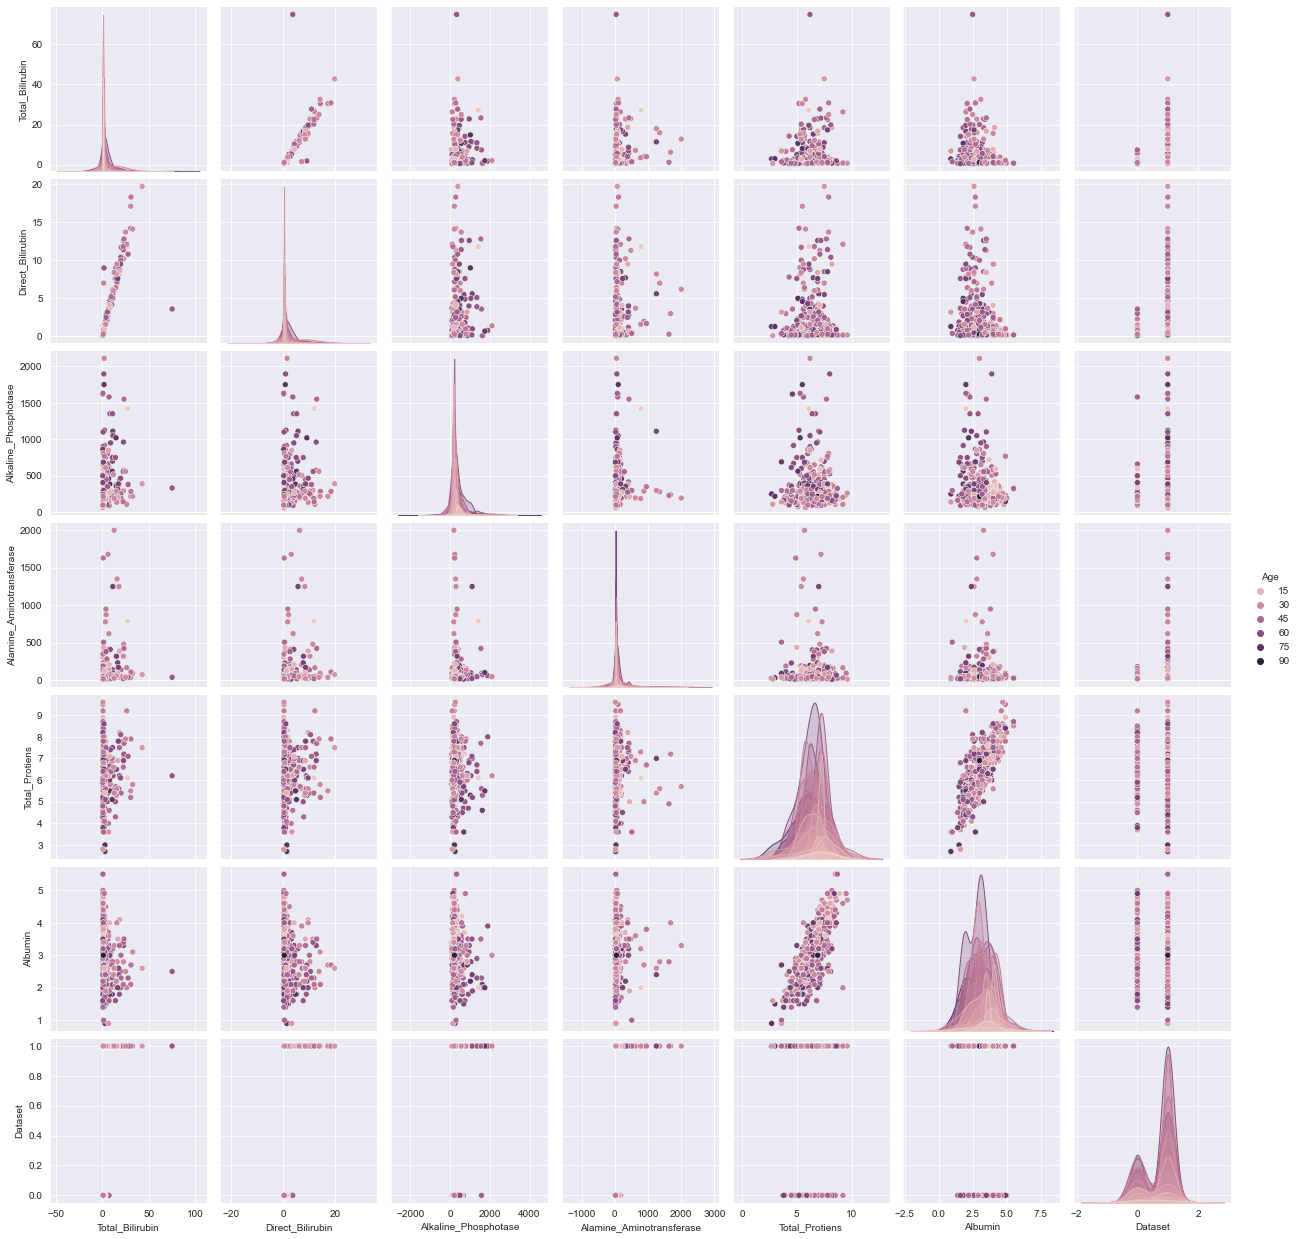

In [18]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='Age')

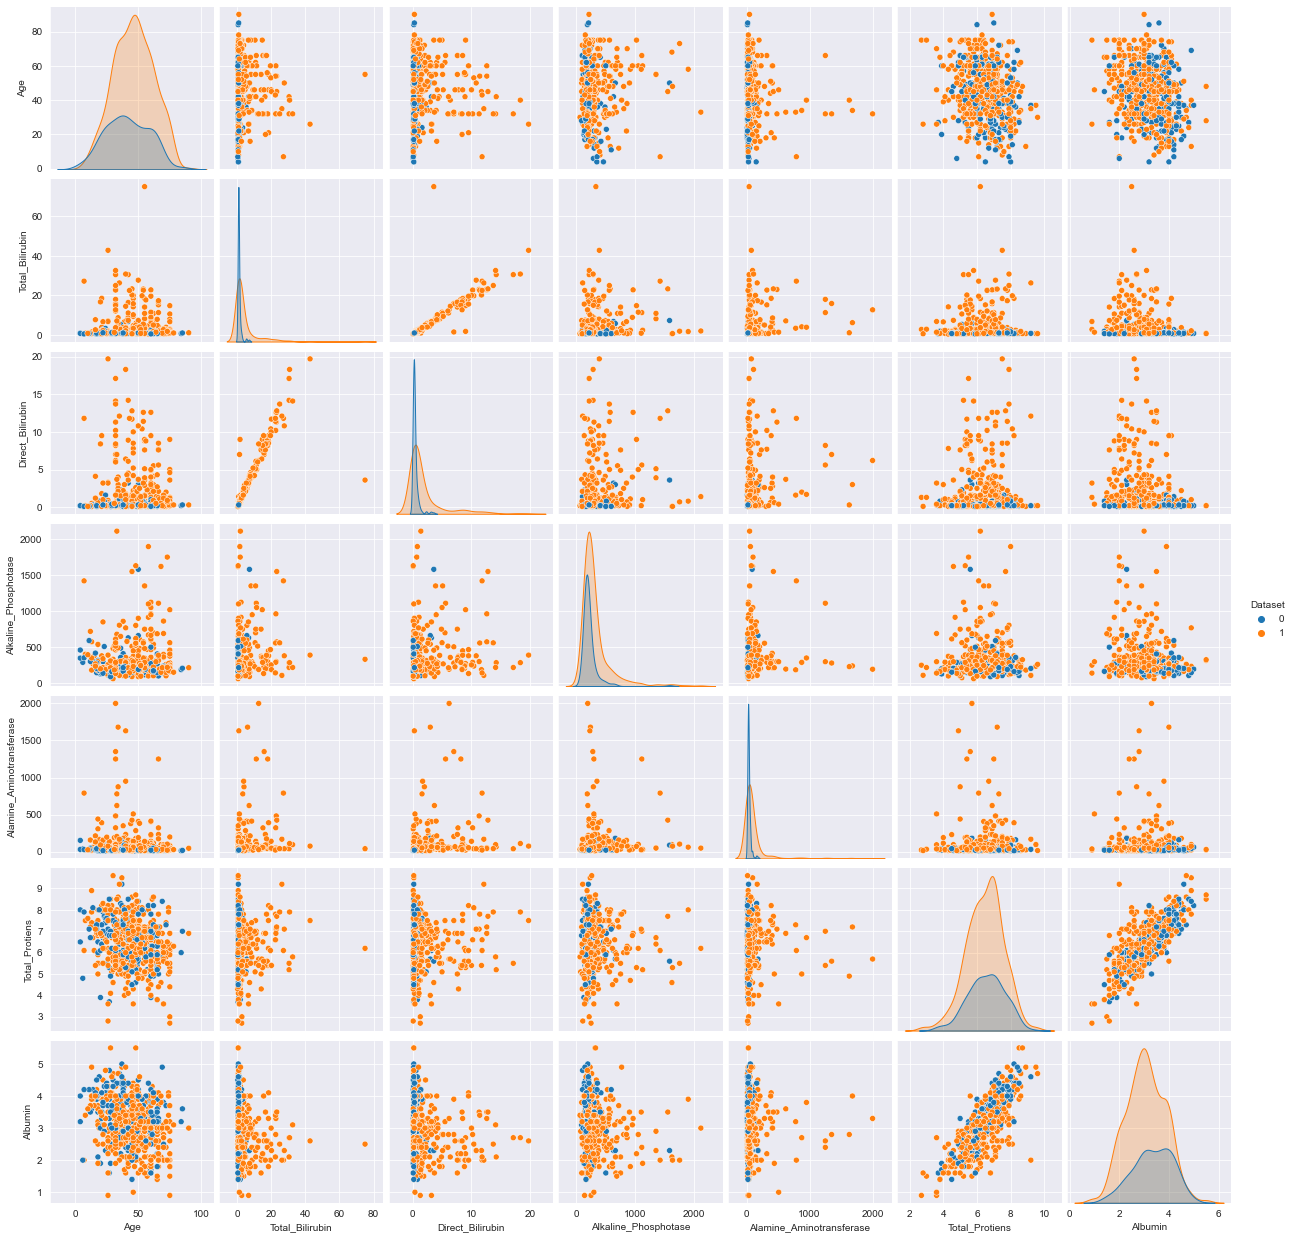

In [19]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='Dataset')

In [20]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin', 'Dataset'],
      dtype='object')

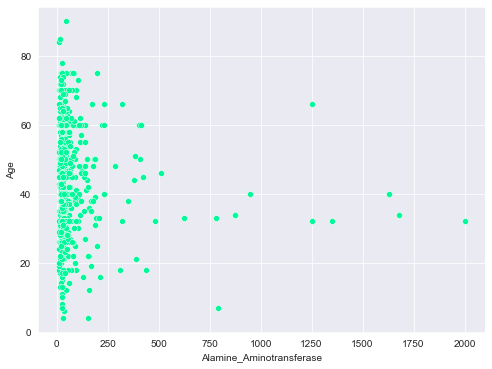

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Alamine_Aminotransferase", y="Age",color='mediumspringgreen',data=df);
plt.show()

<AxesSubplot:>

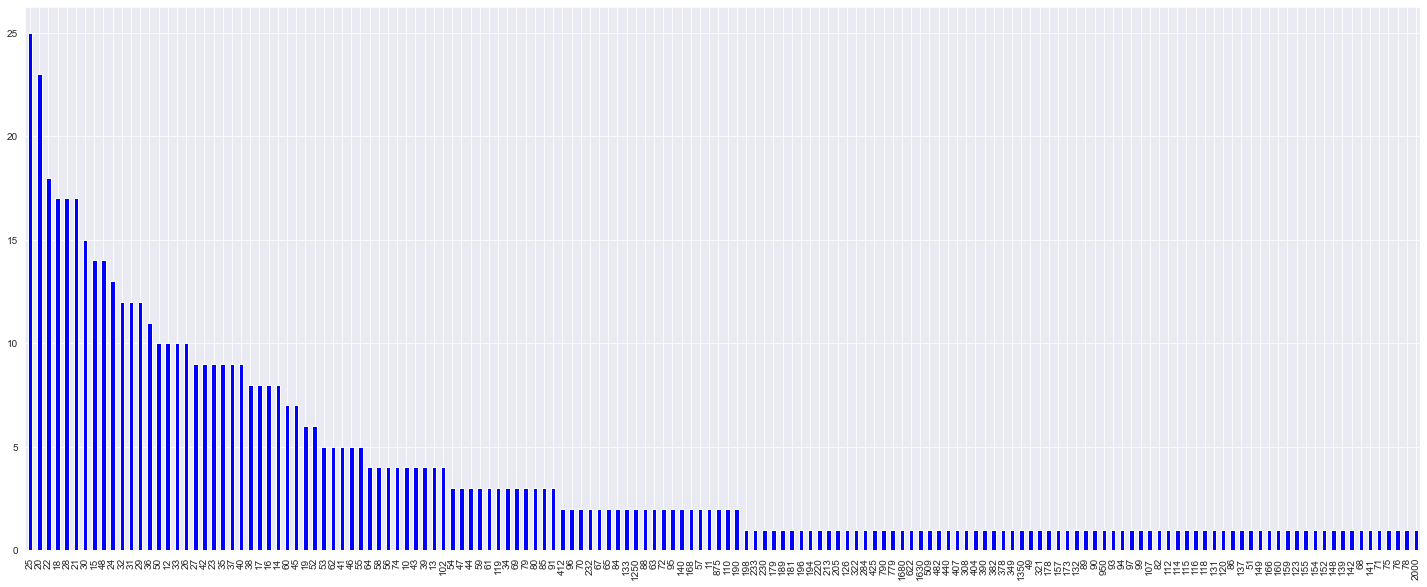

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['Alamine_Aminotransferase'].value_counts().plot.bar(color='blue')

<AxesSubplot:xlabel='Dataset'>

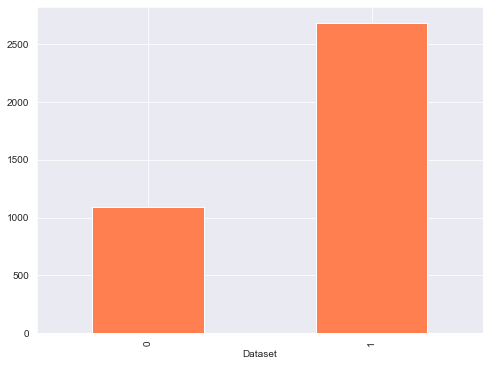

In [27]:
plt.figure(figsize=(8,6))
df.groupby('Dataset').sum()["Total_Protiens"].plot.bar(color='coral')

<AxesSubplot:xlabel='Dataset'>

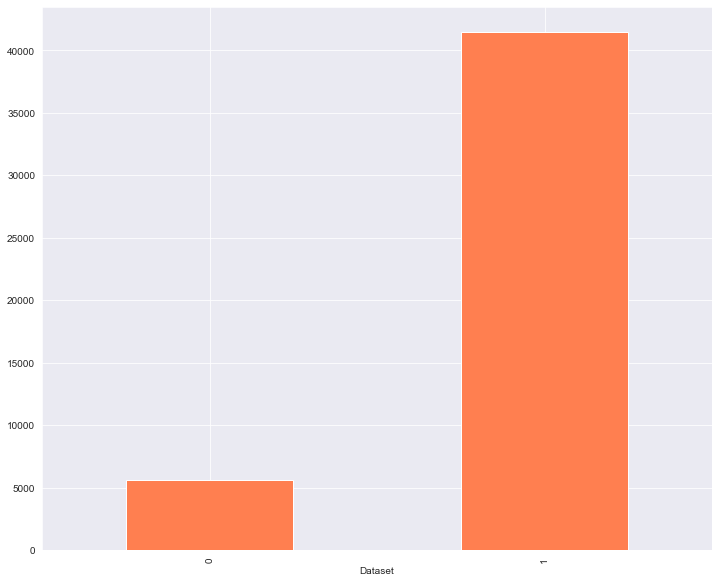

In [26]:
plt.figure(figsize=(12,10))
df.groupby('Dataset').sum()["Alamine_Aminotransferase"].plot.bar(color='coral')

<AxesSubplot:xlabel='Dataset'>

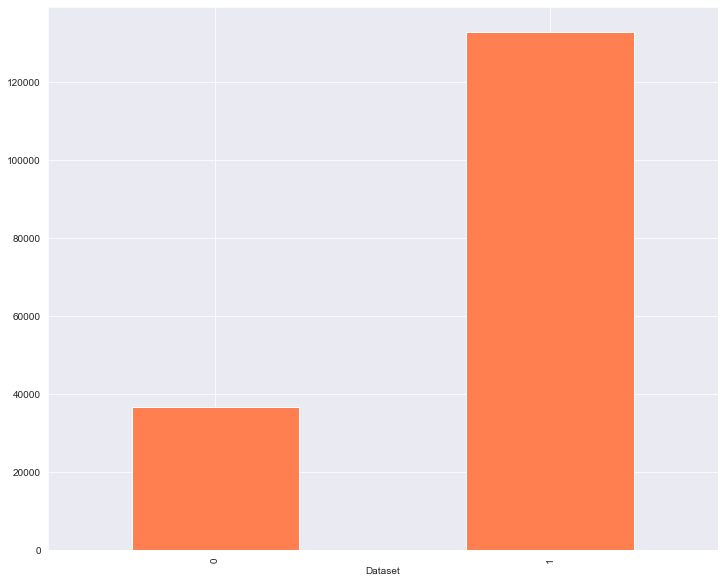

In [28]:
plt.figure(figsize=(12,10))
df.groupby('Dataset').sum()["Alkaline_Phosphotase"].plot.bar(color='coral')

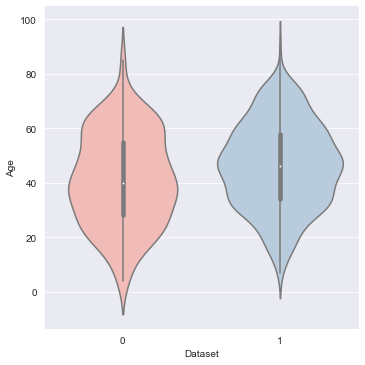

In [37]:
# Let's look at Age
g = sns.factorplot(x="Dataset", y = "Age",data = df, kind="violin", palette = "Pastel1")

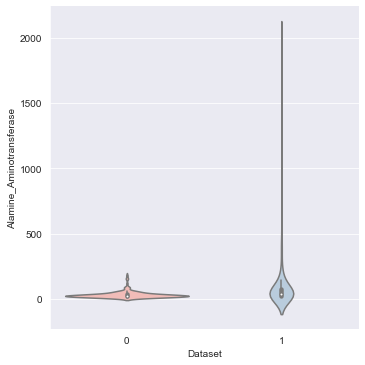

In [38]:
# Let's look at SGPT == Alamine_Aminotransferase 
g = sns.factorplot(x="Dataset", y = "Alamine_Aminotransferase",data = df, kind="violin", palette = "Pastel1")

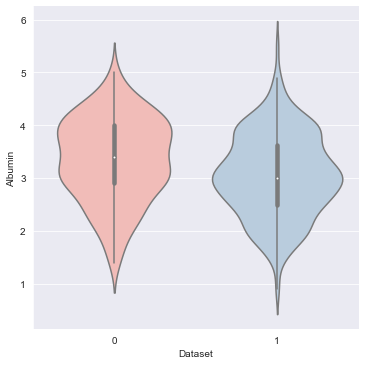

In [39]:
# Let's look at Albumin
g = sns.factorplot(x="Dataset", y = "Albumin",data = df, kind="violin", palette = "Pastel1")

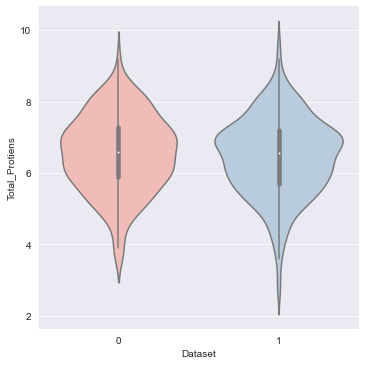

In [40]:
# Let's look at Albumin
g = sns.factorplot(x="Dataset", y = "Total_Protiens",data = df, kind="violin", palette = "Pastel1")

In [29]:
corr=df.corr()

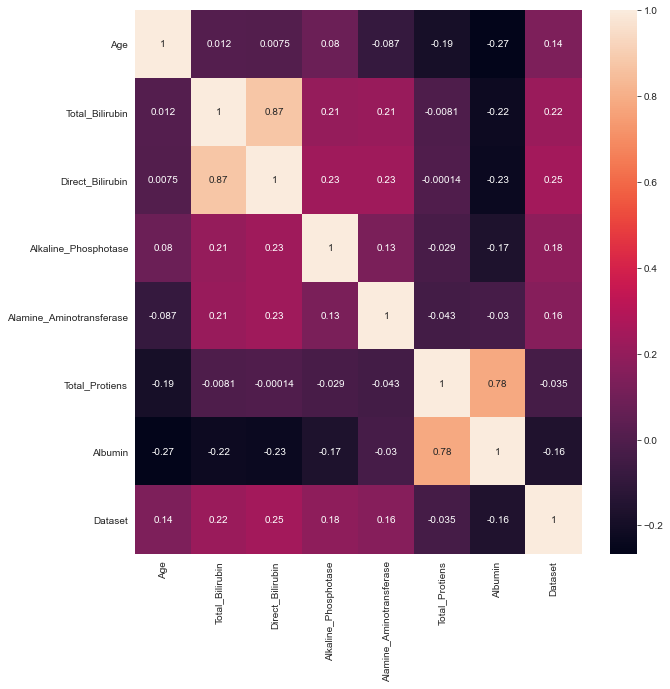

In [31]:
sns.heatmap(corr, annot = True)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin', 'Dataset'],
      dtype='object')

In [34]:
X=df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
        'Total_Protiens', 'Albumin']]
y=df['Dataset']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest classifier has accuracy of: ", rf.score(X_test, y_test))
# Evaluate the confusion_matrix
confusion_matrix(y_test, y_pred)

Random Forest classifier has accuracy of:  0.6923076923076923


array([[11, 26],
       [10, 70]], dtype=int64)

In [ ]:
# Feature selection 

In [43]:
X=df[['Age','Alkaline_Phosphotase','Alamine_Aminotransferase']]
y=df['Dataset']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [51]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = rf.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Random forest classifier: ", rf.score(X_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of Random forest classifier:  0.6923076923076923
[[10 29]
 [ 7 71]]


In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
abc = AdaBoostClassifier(n_estimators=400)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=400)

In [63]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = abc.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Adaboost classifier: ", abc.score(X_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of Adaboost classifier:  0.6581196581196581
[[ 9 30]
 [10 68]]
